# Amazon Consumer Behavior Dataset

## Índice

- [Depuración de los datos](#Depuración-de-los-datos)
- [Análisis gráfico](#Análisis-gráfico)
- [Segmentación de clientes](#Segmentación-de-clientes)

## Librerías y carga de archivo

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

import sklearn.impute as skl_imp
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

Cargamos el excel donde se han guardado los datos y renombramos las variables ya que algunas tenían espacios, por lo que aprovechamos y renombramos todas las demás para hacerlo más entendible.

In [2]:
costumer_behavior = pd.read_csv('C:\\Users\\danie\\Desktop\\TFM\\Amazon Customer Behavior Survey.csv')

In [3]:
costumer_behavior.rename({'age': 'Edad','Gender': 'Genero', 'Purchase_Frequency': 'Frecuencia_compra', 'Purchase_Categories': 'Categorias_compra',
                          'Personalized_Recommendation_Frequency': 'Compra_por_recomendacion', 'Browsing_Frequency': 'Frecuencia_navegacion', 
                          'Product_Search_Method': 'Metodo_busqueda', 'Search_Result_Exploration': 'Exploracion', 
                          'Customer_Reviews_Importance': 'Imp_reseñas', 'Add_to_Cart_Browsing': 'Carrito',
                          'Cart_Completion_Frequency': 'Frecuencia_carrito', 'Cart_Abandonment_Factors': 'Factores_abandono',
                          'Saveforlater_Frequency': 'Frecuencia_guardar', 'Review_Left': 'Reseña', 'Review_Reliability': 'Confianza_reseñas',
                          'Review_Helpfulness': 'Utilidad_reseñas', 'Personalized_Recommendation_Frequency ': 'Frecuencia_recomendaciones',
                          'Recommendation_Helpfulness': 'Utilidad_recomendaciones', 'Rating_Accuracy ': 'Precision_recomendaciones', 
                          'Shopping_Satisfaction': 'Satisfaccion', 'Service_Appreciation': 'Valor', 
                          'Improvement_Areas': 'Mejoras'}, axis=1, inplace= True)

## Depuración de los datos

La depuración o "limpieza" de los datos es crucial y a través de ella se intenta obtener un modelo libre de sesgos. En este proceso hay cuatro comprobaciones principales que debemos hacer sobre el dataset en cuestión. Estas son la **tipología de las variables**, los **valores mal codificados**, los **valores fuera de rango** y los factores con **categorías minoritarias**. 

Para comenzar, utilizaremos las funciones ```head()```, ```info()``` y ```nunique()```, que nos proporcionarán los primeros datos.

In [4]:
costumer_behavior.head()

,Timestamp,Edad,Genero,Frecuencia_compra,Categorias_compra,Compra_por_recomendacion,Frecuencia_navegacion,Metodo_busqueda,Exploracion,Imp_reseñas,...,Frecuencia_guardar,Reseña,Confianza_reseñas,Utilidad_reseñas,Frecuencia_recomendaciones,Utilidad_recomendaciones,Precision_recomendaciones,Satisfaccion,Valor,Mejoras
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


Con ```head()``` podemos echar un primer vistazo general, pero utilizamos ```info()``` para observar el tipo de cada variable y ```nunique()``` para observar los valores únicos.

In [5]:
costumer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp                   602 non-null    object
 1   Edad                        602 non-null    int64 
 2   Genero                      602 non-null    object
 3   Frecuencia_compra           602 non-null    object
 4   Categorias_compra           602 non-null    object
 5   Compra_por_recomendacion    602 non-null    object
 6   Frecuencia_navegacion       602 non-null    object
 7   Metodo_busqueda             600 non-null    object
 8   Exploracion                 602 non-null    object
 9   Imp_reseñas                 602 non-null    int64 
 10  Carrito                     602 non-null    object
 11  Frecuencia_carrito          602 non-null    object
 12  Factores_abandono           602 non-null    object
 13  Frecuencia_guardar          602 non-null    object

In [6]:
costumer_behavior.nunique()

Timestamp                     601
Edad                           50
Genero                          4
Frecuencia_compra               5
Categorias_compra              29
Compra_por_recomendacion        3
Frecuencia_navegacion           4
Metodo_busqueda                 4
Exploracion                     2
Imp_reseñas                     5
Carrito                         3
Frecuencia_carrito              5
Factores_abandono               4
Frecuencia_guardar              5
Reseña                          2
Confianza_reseñas               5
Utilidad_reseñas                3
Frecuencia_recomendaciones      5
Utilidad_recomendaciones        3
Precision_recomendaciones       5
Satisfaccion                    5
Valor                           9
Mejoras                        18
dtype: int64

Antes que nada, podemos ver que la variable *Timestamp* nos es irrelevante, ya que nos indica la fecha y la hora a la que el cliente contestó la encuesta y esto no nos va a resultar determinante en ningún sentido. La eliminamos.

In [7]:
costumer_behavior.drop(columns = ["Timestamp"], inplace = True)

Volviendo al resultado obtenido con ```info()``` y ```nunique()```, hay bastantes variables categóricas como tipo object. 

Las variables categóricas suelen tener diez o menos valores únicos, por lo que identificamos la presencia de 19 categóricas. Las convertiremos y luego veremos si además podemos agrupar sus respectivas categorías minoritarias para evitar asimetrías.

In [8]:
categorical_list = list(costumer_behavior.loc[:,costumer_behavior.nunique() <= 10]);  
del categorical_list[9] # Eliminamos la variable Factores_abandono de la lista porque es object
for column in categorical_list:
    costumer_behavior[column] = costumer_behavior[column].astype('category')

Utilizamos ```info()``` para observar los tipos de las variables corregidos y ```describe()``` para sacar los descriptivos básicos, en este caso, de las variables nominales.

In [9]:
costumer_behavior.info()
costumer_behavior.describe(exclude=np.number)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Edad                        602 non-null    int64   
 1   Genero                      602 non-null    category
 2   Frecuencia_compra           602 non-null    category
 3   Categorias_compra           602 non-null    object  
 4   Compra_por_recomendacion    602 non-null    category
 5   Frecuencia_navegacion       602 non-null    category
 6   Metodo_busqueda             600 non-null    category
 7   Exploracion                 602 non-null    category
 8   Imp_reseñas                 602 non-null    category
 9   Carrito                     602 non-null    category
 10  Frecuencia_carrito          602 non-null    category
 11  Factores_abandono           602 non-null    object  
 12  Frecuencia_guardar          602 non-null    category
 13  Reseña              

,Genero,Frecuencia_compra,Categorias_compra,Compra_por_recomendacion,Frecuencia_navegacion,Metodo_busqueda,Exploracion,Imp_reseñas,Carrito,Frecuencia_carrito,...,Frecuencia_guardar,Reseña,Confianza_reseñas,Utilidad_reseñas,Frecuencia_recomendaciones,Utilidad_recomendaciones,Precision_recomendaciones,Satisfaccion,Valor,Mejoras
count,602,602,602,602,602,600,602,602,602,602,...,602,602,602,602,602,602,602,602,602,602
unique,4,5,29,3,4,4,2,5,3,5,...,5,2,5,3,5,3,5,5,9,18
top,Female,Few times a month,Beauty and Personal Care,No,Few times a week,categories,Multiple pages,3,Maybe,Sometimes,...,Sometimes,Yes,Moderately,Yes,3,Sometimes,3,3,Product recommendations,Customer service responsiveness
freq,352,203,106,251,249,223,442,216,248,304,...,251,310,199,237,240,273,288,209,185,217


Esta vez usaremos el ```describe()``` con las variables númericas, que nos informará sobre cuartiles, media, máximos... 

In [10]:
costumer_behavior.describe()

,Edad
count,602.000000
mean,30.790698
std,10.193276
min,3.000000
25%,23.000000
50%,26.000000
75%,36.000000
max,67.000000


En principio no habrían valores fuera de rango (los valores son normales), aunque es probable que tenga una distribución levemente asimétrica positiva porque el máximo es alto si lo comparamos con la media.

También debemos revisar si existen duplicados y eliminarlos.

In [11]:
costumer_behavior.select_dtypes(include=np.number).apply(lambda x: x.skew())

Edad    1.007857
dtype: float64

In [12]:
costumer_behavior.duplicated().sum()

0

Llegados a este punto, vamos a proceder a la posible agrupación de categorías minoritarias y demás aspectos que veamos relevantes de nuestras variables. Para ello, usamos la función ```value_counts()```, que nos muestra los valores de la variable y la frecuencia de cada uno de ellos.

1. **Categorias_compra**: es la primera variable que vamos a analizar ya que su naturaleza es obviamente categórica pero tiene 29 valores únicos. 

In [13]:
costumer_behavior.Categorias_compra.value_counts()

Categorias_compra
Beauty and Personal Care                                                                            106
Clothing and Fashion                                                                                106
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     24
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others  

Nos damos cuenta de que la variable tiene tantos valores únicos porque hay clientes que compran productos de varias categorías. Una posible solución sería crear una variable dummy para cada categoría con valor 0 cuando no hayan productos de dicha categoría y 1 cuando sí. Podemos eliminar la variable *Categorias_compra* y quedarnos con las cinco dummies generadas, que renombraremos.

In [14]:
categorias = costumer_behavior['Categorias_compra'].str.get_dummies(sep=';')

In [15]:
costumer_behavior = pd.concat([costumer_behavior, categorias], axis=1)

In [16]:
costumer_behavior.rename({'Beauty and Personal Care': 'Belleza_y_cuidado_personal','Clothing and Fashion': 'Ropa_y_moda',
                          'Groceries and Gourmet Food': 'Alimentación_y_productos_gourmet', 'Home and Kitchen': 'Hogar_y_cocina', 
                          'others': 'Otros'}, axis=1, inplace= True)

In [17]:
costumer_behavior.drop(columns = ["Categorias_compra"], inplace = True)

2. **Genero**: una posible agrupación es juntar los valores correspondientes a Prefer not to say y Others. 

In [18]:
costumer_behavior.Genero.value_counts()

Genero
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64

In [19]:
Others_ = ['Prefer not to say', 'Others']
costumer_behavior['Genero'] = costumer_behavior['Genero'].replace(Others_, 'Others')

In [20]:
costumer_behavior.Genero.value_counts()

Genero
Female    352
Male      142
Others    108
Name: count, dtype: int64

3. **Valor**: una posible agrupación sería agrupar todos los valores con uno en un nuevo valor llamado Others

In [21]:
costumer_behavior.Valor.value_counts()

Valor
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
.                                        1
All the above                            1
Customer service                         1
Customer service                         1
Quick delivery                           1
Name: count, dtype: int64

In [22]:
Others__ = ['.', 'All the above', 'Quick delivery']
costumer_behavior['Valor'] = costumer_behavior['Valor'].replace('Customer service', 'Others')
costumer_behavior['Valor'] = costumer_behavior['Valor'].replace('Customer service ', 'Others')
costumer_behavior['Valor'] = costumer_behavior['Valor'].replace(Others__, 'Others')

In [23]:
costumer_behavior.Valor.value_counts()

Valor
Product recommendations                185
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
Others                                   5
Name: count, dtype: int64

In [24]:
costumer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Edad                              602 non-null    int64   
 1   Genero                            602 non-null    category
 2   Frecuencia_compra                 602 non-null    category
 3   Compra_por_recomendacion          602 non-null    category
 4   Frecuencia_navegacion             602 non-null    category
 5   Metodo_busqueda                   600 non-null    category
 6   Exploracion                       602 non-null    category
 7   Imp_reseñas                       602 non-null    category
 8   Carrito                           602 non-null    category
 9   Frecuencia_carrito                602 non-null    category
 10  Factores_abandono                 602 non-null    object  
 11  Frecuencia_guardar                602 non-null    category

4. **Frecuencia_carrito** y **Carrito**: hay una gran inconsistencia en estas variables. La variable *Carrito* indica si el cliente agrega productos a su carrito mientras navega en Amazon y la variable *Frecuencia_carrito* indica con qué frecuencia el cliente termina la compra después de agregar productos a su carrito. Por lo tanto, está claro que carece de sentido que indiquen la frecuencia con la que han terminado la compra de productos que han añadido al carrito los clientes que han dicho que no agregan productos al carrito mientras navegan en la web. Sin embargo, tenemos varios casos y lo podemos asociar, por ejemplo, a que quizás a pesar de responder que no a la primera pregunta, se les obligaba a contestar la segunda. Es decir, fallos en la recogida de datos.

   Lo importante en cualquier caso es darle solución, por lo que lo que se va a hacer es crear otro valor en la variable *Frecuencia_carrito* llamada "No agrega productos al carrito", que se le asignará automáticamente a aquellos clientes que hayan indicado en la variable "Carrito" que "No".

In [25]:
costumer_behavior['Frecuencia_carrito'] = costumer_behavior.apply(
    lambda row: 'No agrega productos al carrito' if row['Carrito'] == 'No' else row['Frecuencia_carrito'],
    axis=1
)

### Missings

Tras llevar a cabo las comprobaciones iniciales, el siguiente paso es **analizar y gestionar los valores perdidos o missings**. Estos valores se suelen relacionar con fallos en la recogida de datos y resulta crucial su identificación y posterior imputación, en caso de que la proporción de missings sea lo suficientemente significativa.

Aplicamos la función ```isna()``` acompañada de la función ```sum()``` para calcular la proporción de valores pérdidos por variable.

In [26]:
costumer_behavior.apply(lambda x: x.isna().sum()/len(x)*100)

Edad                                0.000000
Genero                              0.000000
Frecuencia_compra                   0.000000
Compra_por_recomendacion            0.000000
Frecuencia_navegacion               0.000000
Metodo_busqueda                     0.332226
Exploracion                         0.000000
Imp_reseñas                         0.000000
Carrito                             0.000000
Frecuencia_carrito                  0.000000
Factores_abandono                   0.000000
Frecuencia_guardar                  0.000000
Reseña                              0.000000
Confianza_reseñas                   0.000000
Utilidad_reseñas                    0.000000
Frecuencia_recomendaciones          0.000000
Utilidad_recomendaciones            0.000000
Precision_recomendaciones           0.000000
Satisfaccion                        0.000000
Valor                               0.000000
Mejoras                             0.000000
Belleza_y_cuidado_personal          0.000000
Ropa_y_mod

Vemos que la única variable que tiene valores perdidos es *Metodo_busqueda*, con un 0,33% de los valores. Aunque la proporción es muy pequeña y podríamos eliminar las observaciones que tengan al menos un valor perdido, lo que haremos será imputar por la moda para no perder ningún registro:

In [27]:
imputer_moda = SimpleImputer(strategy='most_frequent')

imputer_moda.fit(costumer_behavior[['Metodo_busqueda']])

costumer_behavior['Metodo_busqueda'] = imputer_moda.transform(costumer_behavior[['Metodo_busqueda']]).ravel()

Volvemos a convertir la variable *Metodo_busqueda* a tipo categórica:

In [28]:
costumer_behavior['Metodo_busqueda'] = costumer_behavior['Metodo_busqueda'].astype('category')

In [29]:
costumer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Edad                              602 non-null    int64   
 1   Genero                            602 non-null    category
 2   Frecuencia_compra                 602 non-null    category
 3   Compra_por_recomendacion          602 non-null    category
 4   Frecuencia_navegacion             602 non-null    category
 5   Metodo_busqueda                   602 non-null    category
 6   Exploracion                       602 non-null    category
 7   Imp_reseñas                       602 non-null    category
 8   Carrito                           602 non-null    category
 9   Frecuencia_carrito                602 non-null    object  
 10  Factores_abandono                 602 non-null    object  
 11  Frecuencia_guardar                602 non-null    category

## Análisis gráfico 
Ahora que todas las variables tienen el tipo correcto y antes de empezar el proceso de transformación de las variables a numéricas, vamos a observar las características y el comportamiento de los clientes a través de algunas visualizaciones gráficas sencillas. De esta forma podremos saber más acerca de los clientes y del dataset frente al que nos encontramos. Con este fin vamos a crear dos mallas:

* La **primera malla** será de 2x2 (2 filas por 2 columnas) y recogerá datos del cliente relativos a su edad y género junto con otros datos de comportamiento como la frecuencia de compra en Amazon, las categorías de los productos que compran o la frecuencia con la que usan el carrito. Para ello, en primer lugar se crea la malla como tal gracias a la función ```subplot()``` y se van añadiendo sucesivamente los gráficos. 

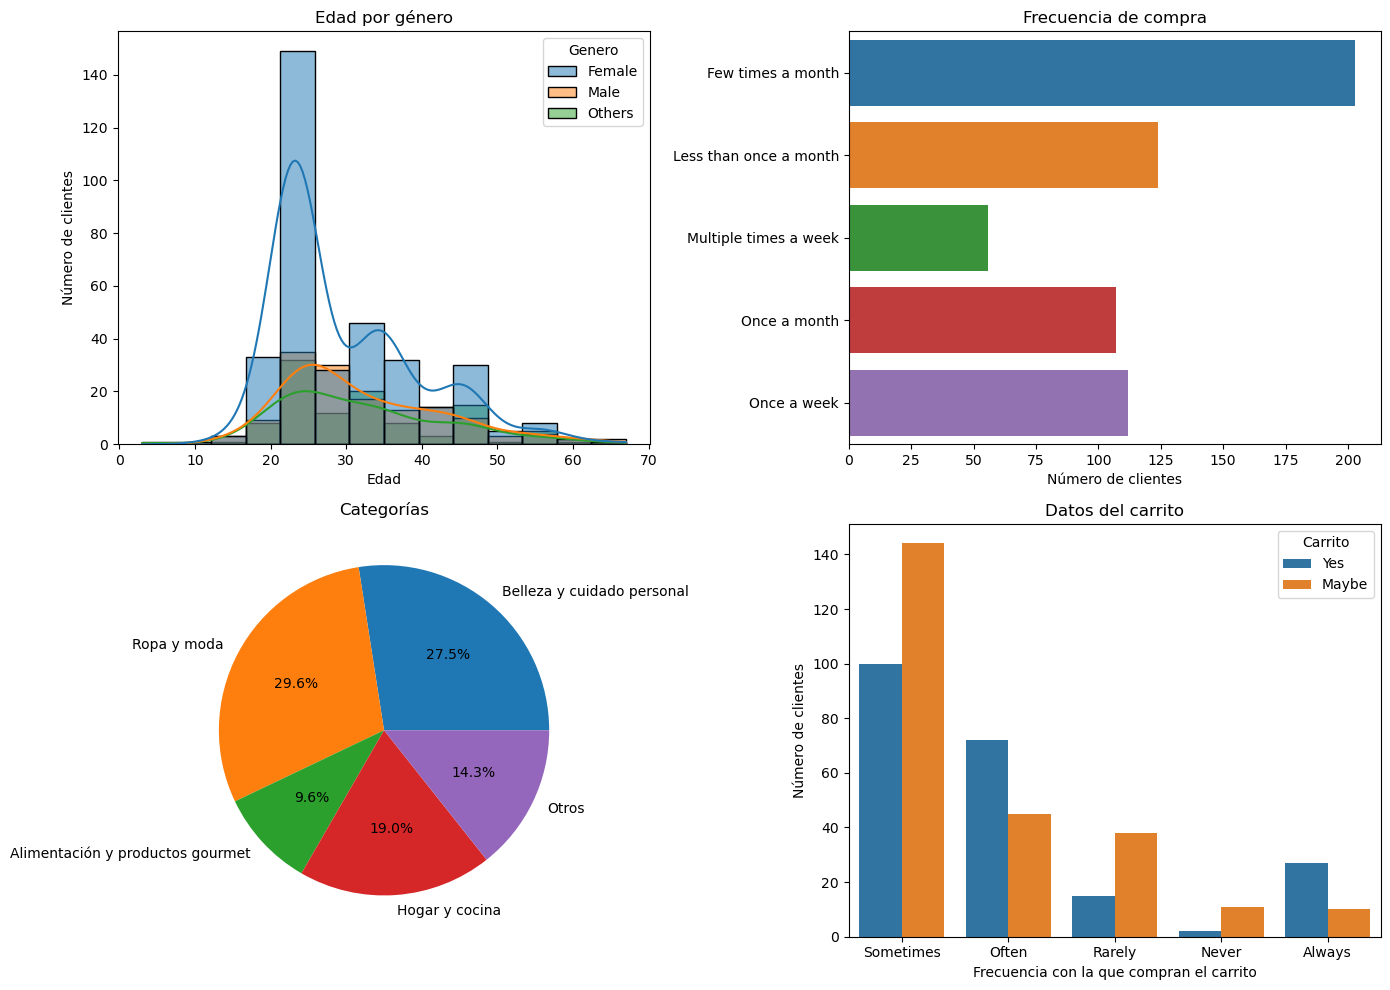

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) # creación de la malla de 2 filas por 2 columnas

# Primer gráfico
sns.histplot(data=costumer_behavior, x='Edad', kde=True, hue= 'Genero', bins=14, ax=axs[0,0])
axs[0, 0].set_title('Edad por género')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Número de clientes')

# Segundo gráfico
sns.countplot(data=costumer_behavior, y='Frecuencia_compra', ax=axs[0,1]) 
axs[0, 1].set_title('Frecuencia de compra')
axs[0, 1].set_ylabel("")
axs[0, 1].set_xlabel('Número de clientes')

# Tercer gráfico
categorias_piechart = ['Belleza_y_cuidado_personal', 'Ropa_y_moda', 'Alimentación_y_productos_gourmet', 'Hogar_y_cocina', 'Otros']
compras_clientes = costumer_behavior[categorias_piechart].sum()
axs[1, 0].pie(compras_clientes, labels=['Belleza y cuidado personal', 'Ropa y moda', 'Alimentación y productos gourmet', 'Hogar y cocina', 'Otros'], 
        autopct='%1.1f%%')
axs[1, 0].set_title('Categorías')

# Cuarto gráfico
datos_sin_no = costumer_behavior[
    (costumer_behavior['Carrito'] != 'No') |
    (costumer_behavior['Frecuencia_carrito'] != 'No agrega productos al carrito')
]
hue_order = datos_sin_no['Carrito'].unique()
sns.countplot(data=datos_sin_no, x='Frecuencia_carrito', hue= 'Carrito', ax=axs[1,1], hue_order=hue_order)
axs[1, 1].set_title('Datos del carrito')
axs[1, 1].set_ylabel('Número de clientes')
axs[1, 1].set_xlabel('Frecuencia con la que compran el carrito')

plt.tight_layout() # función que ajusta los márgenes entre los gráficos

plt.show()

* La **segunda malla** será de 1x2 (1 fila por 2 columnas) y recogerá datos relativos a la utilidad que los clientes asignan a las reseñas y a las recomendaciones según si ellos alguna vez han dejado una reseña de un producto en Amazon o si alguna vez han realizado una compra basándose en recomendaciones de productos personalizados.

Text(0.5, 0, 'Utilidad que le asigna el cliente a las recomendaciones')

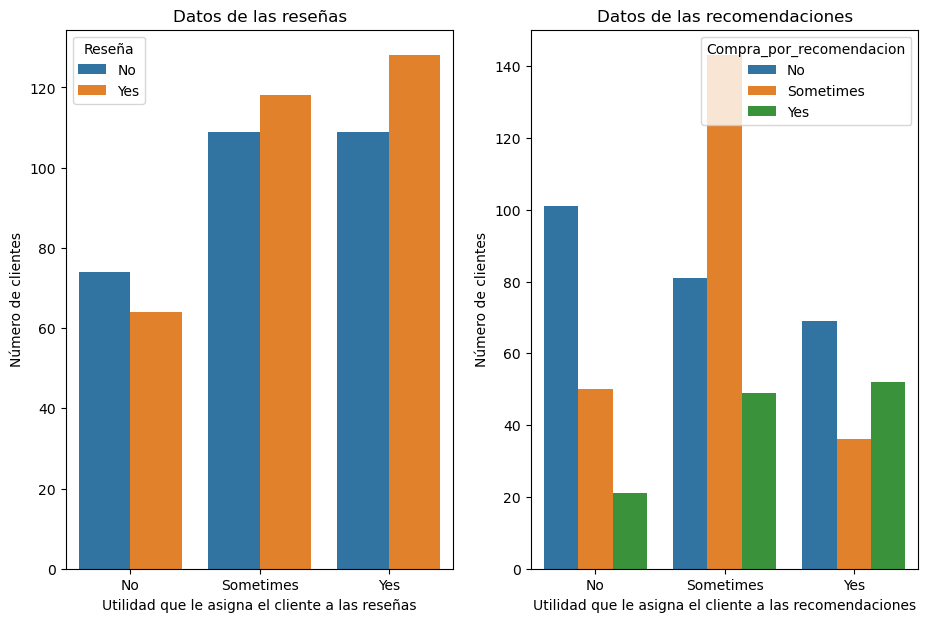

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(11, 7)) # creación de la malla de 1 fila por 2 columnas

# Primer gráfico
sns.countplot(data=costumer_behavior, x='Utilidad_reseñas', hue= 'Reseña', ax=axs[0])
axs[0].set_title('Datos de las reseñas')
axs[0].set_ylabel('Número de clientes')
axs[0].set_xlabel('Utilidad que le asigna el cliente a las reseñas')

# Segundo gráfico
sns.countplot(data=costumer_behavior, x='Utilidad_recomendaciones', hue= 'Compra_por_recomendacion', ax=axs[1])
axs[1].set_title('Datos de las recomendaciones')
axs[1].set_ylabel('Número de clientes')
axs[1].set_xlabel('Utilidad que le asigna el cliente a las recomendaciones')

## Transformación de variables a numéricas

El siguiente paso es transformar todas las variables a numéricas y para ello tenemos varios métodos. En este caso, nos vamos a ayudar de las funciones ```LabelEncoder()```, ```map()``` y ```astype()```

* **LabelEncoder()**: creamos una lista con las variables que vamos a codificar a través de esta función y luego recorremos la lista transformando a numérica cada valor gracias a la función ```fit_transform```

In [32]:
le = LabelEncoder()
variables_le_ = ['Genero', 'Frecuencia_compra', 'Frecuencia_navegacion', 'Metodo_busqueda', 'Frecuencia_carrito', 'Factores_abandono',
                 'Frecuencia_guardar', 'Confianza_reseñas', 'Frecuencia_recomendaciones', 'Valor', 'Mejoras']
for m in variables_le_:
    costumer_behavior[m] = le.fit_transform(costumer_behavior[m])

* **map()**: esta función nos permite asignarle un valor númerico personalizado a cada categoría a través de un diccionario. Es importante tener en cuenta que después de asignar estos valores la variable estará preparada para ser convertida a tipo int.

In [33]:
costumer_behavior['Compra_por_recomendacion'] = costumer_behavior['Compra_por_recomendacion'].map({'No': 0, 'Sometimes': 2, 'Yes': 1})
costumer_behavior['Carrito'] = costumer_behavior['Carrito'].map({'Maybe': 2, 'Yes': 1, 'No': 0})
costumer_behavior['Utilidad_reseñas'] = costumer_behavior['Utilidad_reseñas'].map({'Yes': 1, 'Sometimes': 2, 'No': 0})
costumer_behavior['Exploracion'] = costumer_behavior['Exploracion'].map({'Multiple pages': 1, 'First page': 0})
costumer_behavior['Utilidad_recomendaciones'] = costumer_behavior['Utilidad_recomendaciones'].map({'Yes': 1, 'Sometimes': 2, 'No': 0})
costumer_behavior['Reseña'] = costumer_behavior['Reseña'].map({'Yes': 1, 'No': 0})

* **astype()**: creamos una lista con las variables que vamos a pasar a tipo int con esta función. En esta lista introducimos todas las variables a las que en la celda anterior le hemos asignado valores numéricos y el resto de variables que nos quedaban por codificar de nuestro dataset.

In [34]:
cols_int = ['Compra_por_recomendacion', 'Carrito', 'Utilidad_reseñas', 'Exploracion', 'Utilidad_recomendaciones', 'Reseña', 'Imp_reseñas', 
            'Precision_recomendaciones', 'Satisfaccion']
costumer_behavior[cols_int] = costumer_behavior[cols_int].astype(int)

Ahora podemos observar el dataset y su información tras la depuración y la transformación de las variables a numéricas de nuevo gracias a ```info()``` y ```head()```

In [35]:
costumer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Edad                              602 non-null    int64
 1   Genero                            602 non-null    int32
 2   Frecuencia_compra                 602 non-null    int32
 3   Compra_por_recomendacion          602 non-null    int32
 4   Frecuencia_navegacion             602 non-null    int32
 5   Metodo_busqueda                   602 non-null    int32
 6   Exploracion                       602 non-null    int32
 7   Imp_reseñas                       602 non-null    int32
 8   Carrito                           602 non-null    int32
 9   Frecuencia_carrito                602 non-null    int32
 10  Factores_abandono                 602 non-null    int32
 11  Frecuencia_guardar                602 non-null    int32
 12  Reseña                            60

In [36]:
costumer_behavior.head()

,Edad,Genero,Frecuencia_compra,Compra_por_recomendacion,Frecuencia_navegacion,Metodo_busqueda,Exploracion,Imp_reseñas,Carrito,Frecuencia_carrito,...,Utilidad_recomendaciones,Precision_recomendaciones,Satisfaccion,Valor,Mejoras,Belleza_y_cuidado_personal,Ropa_y_moda,Alimentación_y_productos_gourmet,Hogar_y_cocina,Otros
0,23,0,0,1,1,1,1,1,1,5,...,1,1,1,0,11,1,0,0,0,0
1,23,0,3,1,0,1,1,1,1,3,...,2,3,2,4,11,0,1,0,0,0
2,24,2,0,0,0,1,1,2,1,5,...,0,3,3,0,9,0,1,1,0,0
3,24,0,3,2,0,1,0,5,2,5,...,2,3,4,0,9,1,1,0,0,1
4,22,0,1,1,0,0,1,1,1,5,...,1,2,2,0,9,1,1,0,0,0


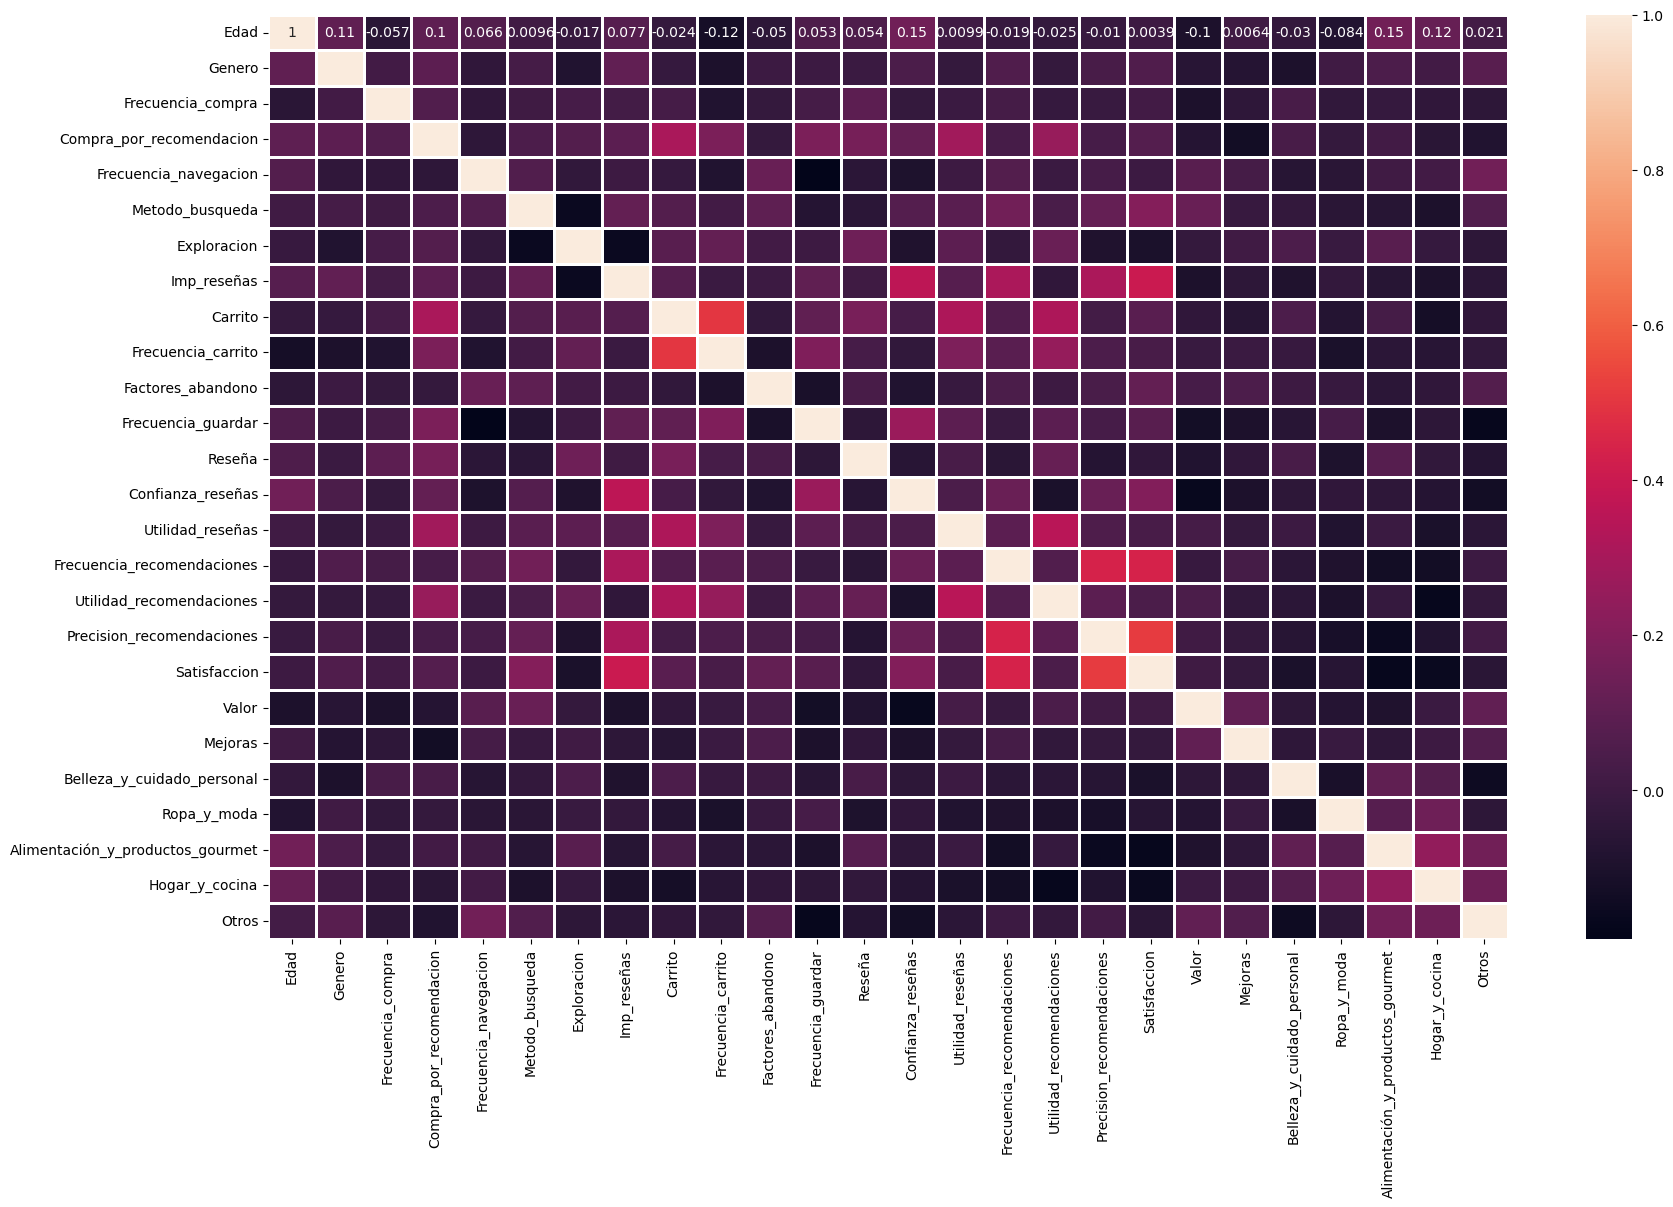

In [37]:
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(costumer_behavior.corr(),annot=True,linewidths=1)
plt.show()

**Se guardan los datos preprocesados en un csv**

In [38]:
costumer_behavior.to_csv("C:\\Users\\danie\\Desktop\\TFM\\TFM-Reproducible\\Costumer Behavior Survey\\procesado\\costumerbehaviorsurvey_preprocessed.csv", index= False)

## Segmentación de clientes
Vamos a hacer clustering jerárquico y k-means para formar grupos similares.  Vamos a realizar el escalado de los datos primero ya que tenemos muchas variables y asi nos aseguraremos de que no hayan variables que pesen más que otras en la solución.

In [39]:
Scaled = scale(costumer_behavior)

In [40]:
from sklearn.cluster import AgglomerativeClustering
from time import time
from scipy.cluster.hierarchy import dendrogram

### Clustering jerárquico

Exploraremos los resultados obtenidos con los métodos de clustering jerárquico a pesar de que presenta una desventaja ante el clustering K-means que será claramente visible: es ideal para conjuntos de datos pequeños y no es nuestro caso. Sin embargo, tiene una ventaja y es que nos servirá para tener una primera idea de la cantidad de clústeres que definiremos para realizar el clustering K-means. 

El primer paso será definir la función ```plot_dendogram()``` para obtener el resultado en un dendograma, que será del que obtendremos el número de grupos:

In [41]:
def plot_dendogram(model, **kwargs):     
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
  
  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)
  
  dendrogram(linkage_matrix, **kwargs)
  plt.show()

El siguiente paso será aplicar distintos métodos de enlace (linkage) que se diferencian entre ellos por la manera en la que definen la distancia entre los clústeres. Esto es lo que hará que los dendogramas que usen los métodos "average", "complete" y "single" se hagan imposibles de visualizar y de estudiar, mientras que el método "ward" seguramente nos arroje un dendograma más representativo. Vamos a obtenerlos todos:

ward :	0.01s


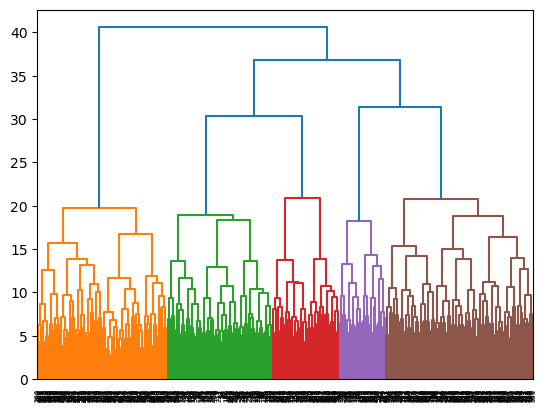

average :	0.01s


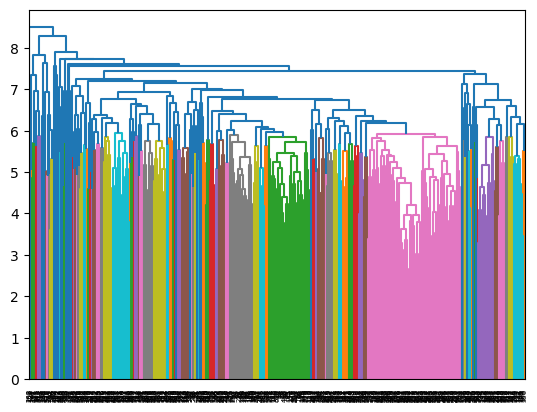

complete :	0.01s


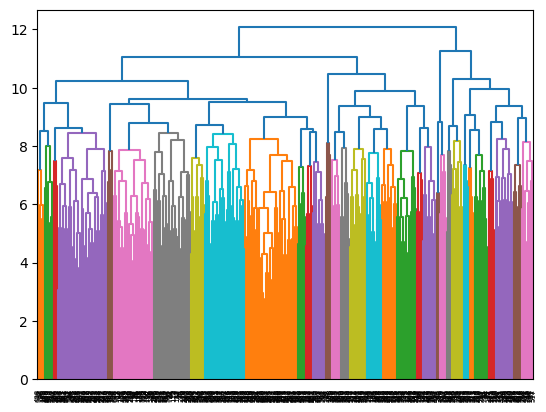

single :	0.01s


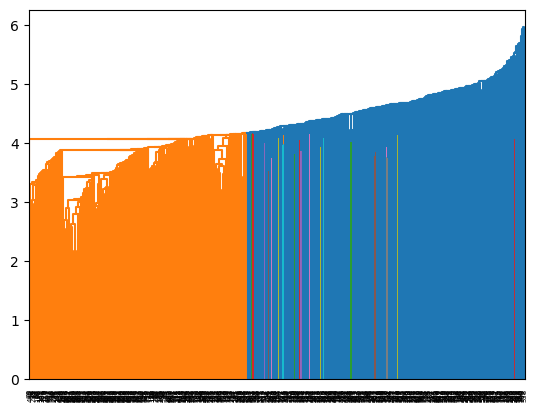

In [42]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(Scaled)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    
    plt.clf()
    plot_dendogram(clustering)

Efectivamente el dendograma creado a través del método de "ward" es el único del que podemos sacar un número de clústeres. El motivo es básicamente que este método de enlace lo que busca es reducir la varianza entre clústeres, por lo que agrupa los puntos de manera que en cada clúster sean lo más parecidos posibles, lo que genera una mayor homogeneidad y hace que los tamaños sean comparables entre ellos. 

Según el dendograma de "ward" elegiríamos cinco grupos que están claramente diferenciados (naranja, verde, rojo, lila y marrón), pero vamos a complementar esta elección con el método K-means para ver si concuerda un método y otro.

### Método K-Means
El primer paso será definir la función ```scree_plot_kmeans()```, que nos permitirá obtener las tres métricas en las que nos vamos a basar para obtener el número de clústeres: la variabilidad interna, la silueta y el porcentaje de variabilidad explicada por los grupos. 

In [43]:
from scipy.spatial.distance import cdist, pdist

def scree_plot_kmeans(data,n_max):
  range_n_clusters = range(2, n_max)
  X_scaled = scale(data)
  inertias = []
  silhouette = []
  var_perc = []
  
  for n_clusters in range_n_clusters:
      modelo_kmeans = KMeans(
                          n_clusters   = n_clusters, 
                          n_init       = 20, 
                          random_state = 123
                      )
      modelo_kmeans.fit(X_scaled)
      cluster_labels = modelo_kmeans.fit_predict(X_scaled)
      inertias.append(modelo_kmeans.inertia_)
      silhouette.append(silhouette_score(X_scaled, cluster_labels))
      tss = sum(pdist(X_scaled)**2)/X_scaled.shape[0]
      bss = tss - modelo_kmeans.inertia_
      var_perc.append(bss/tss*100)
      
  fig, ax = plt.subplots(1, 3, figsize=(16, 6))
  ax[0].plot(range_n_clusters, inertias, marker='o')
  ax[0].set_title("Scree plot Varianza intra")
  ax[0].set_xlabel('Número clusters')
  ax[0].set_ylabel('Intra-cluster (inertia)')
  
  ax[1].plot(range_n_clusters, silhouette, marker='o')
  ax[1].set_title("Scree plot silhouette")
  ax[1].set_xlabel('Número clusters')
  ax[1].set_ylabel('Media índices silhouette');
  
  ax[2].plot(range_n_clusters, var_perc, marker='o')
  ax[2].set_title("Scree plot % Varianza")
  ax[2].set_xlabel('Número clusters')
  ax[2].set_ylabel('% de varianza explicada')

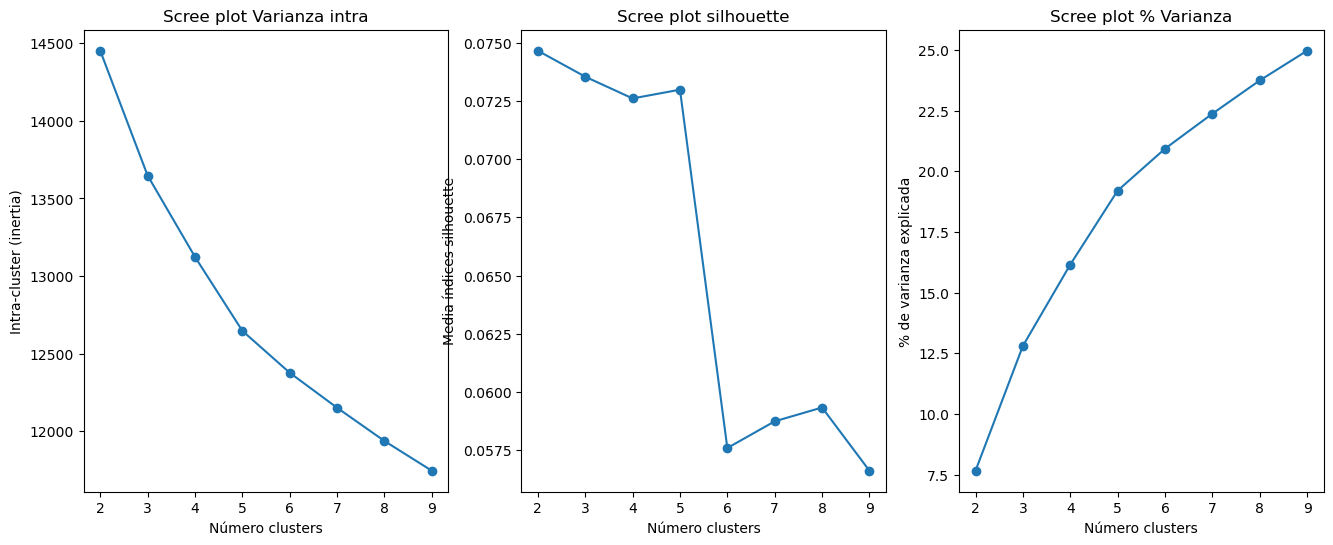

In [44]:
scree_plot_kmeans(costumer_behavior,10)
plt.show()

En general lo que buscamos en los gráficos es un "codo", es decir, un punto a partir del cual las métricas que estamos analizando se estabilicen. 

El gráfico de la izquierda nos indica la suma de las distancias dentro de cada clúster, por lo que lo que buscamos es un punto a partir del cual no sea tan significativa. A pesar de que el "codo" no esté bien definido, podemos concluir que a partir de 4 clústeres se comienza a estabilizar la inercia, aunque debemos complementar esta decisión con los otros dos gráficos para poder tomar la decisión.

En el gráfico del centro buscamos un valor máximo, ya que un valor de 1 nos señala que los clústeres están bien separados y un valor de 0 todo lo contrario. El máximo lo encontramos claramente en 4 clústeres, por lo que seguimos complementando información con el último gráfico.

El gráfico de la derecha muestra el porcentaje de varianza que explican los clústeres, asi que es obvio que cuanto más alto sea este valor mejor. De nuevo no tenemos un "codo", pero en concondancia con las conclusiones obtenidas a raíz de las otras métricas podríamos afirmar que a partir de los 4 clústeres, aunque el porcentaje crezca, lo hace de manera mucho más pausada.
Si juntamos toda la información obtenida, parece que el mejor número de clústeres es 4, lo que resulta coherente con el resultado obtenido por el método del clustering jerárquico (5 clústeres). 

Una vez obtenido el número de grupos, debemos ajustar el clustering. De esta forma podremos generar una variable nueva que indique en cada registro a que grupo pertenece.

In [45]:
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import KMeans

In [46]:
modelo_kmeans = KMeans(n_clusters=4, n_init=25, max_iter=500, random_state=123)
modelo_kmeans.fit(X=Scaled)

KMeans(max_iter=500, n_clusters=4, n_init=25, random_state=123)

In [47]:
labels = modelo_kmeans.fit_predict(Scaled)
costumer_behavior['Cluster'] = pd.Series(labels)
costumer_behavior.head()

,Edad,Genero,Frecuencia_compra,Compra_por_recomendacion,Frecuencia_navegacion,Metodo_busqueda,Exploracion,Imp_reseñas,Carrito,Frecuencia_carrito,...,Precision_recomendaciones,Satisfaccion,Valor,Mejoras,Belleza_y_cuidado_personal,Ropa_y_moda,Alimentación_y_productos_gourmet,Hogar_y_cocina,Otros,Cluster
0,23,0,0,1,1,1,1,1,1,5,...,1,1,0,11,1,0,0,0,0,3
1,23,0,3,1,0,1,1,1,1,3,...,3,2,4,11,0,1,0,0,0,3
2,24,2,0,0,0,1,1,2,1,5,...,3,3,0,9,0,1,1,0,0,1
3,24,0,3,2,0,1,0,5,2,5,...,3,4,0,9,1,1,0,0,1,0
4,22,0,1,1,0,0,1,1,1,5,...,2,2,0,9,1,1,0,0,0,3


In [48]:
costumer_behavior.Cluster.value_counts()

Cluster
3    196
0    163
1    150
2     93
Name: count, dtype: int64

Ahora que tenemos los grupos formados y asignados a cada registro, es interesante extraer los centroides. Estos señalan las características medias de cada uno de los grupos que se han propuesto. Vamos a hacer una lista con las variables del dataset y los centroides para poder crear una tabla más interpretable.

In [49]:
clf = NearestCentroid()
clf.fit(costumer_behavior, labels)

NearestCentroid()

In [50]:
variables = ["Edad", "Genero", "Frecuencia_compra", "Compra_por_recomendacion", "Frecuencia_navegacion", "Metodo_busqueda", "Exploracion", 
             "Imp_reseñas", "Carrito", "Frecuencia_carrito", "Factores_abandono", "Frecuencia_guardar", "Reseña", "Confianza_reseñas", 
             "Utilidad_reseñas", "Frecuencia_recomendaciones", "Utilidad_recomendaciones", "Precision_recomendaciones", "Satisfaccion", 
             "Valor", "Mejoras", "Belleza_y_cuidado_personal", "Ropa_y_moda", "Alimentacion_y_productos_gourmet", "Hogar_y_cocina", "Otros",
             "Cluster"]

In [51]:
centroides = clf.centroids_.tolist()

In [52]:
df_centroides = pd.DataFrame(centroides, columns=variables)
print(df_centroides)

        Edad    Genero  Frecuencia_compra  Compra_por_recomendacion  \
0  30.932515  0.564417           1.865031                  1.619632   
1  34.713333  0.660000           1.666667                  0.646667   
2  30.161290  0.860215           1.516129                  0.784946   
3  27.969388  0.443878           1.581633                  0.744898   

   Frecuencia_navegacion  Metodo_busqueda  Exploracion  Imp_reseñas   Carrito  \
0               0.730061         1.374233     0.840491     3.006135  1.871166   
1               0.846667         0.946667     0.573333     2.620000  0.506667   
2               1.677419         1.806452     0.537634     3.591398  0.967742   
3               1.183673         1.214286     0.862245     1.408163  1.229592   

   Frecuencia_carrito  ...  Precision_recomendaciones  Satisfaccion     Valor  \
0            4.466258  ...                   2.877301      2.889571  1.638037   
1            2.260000  ...                   2.513333      2.266667  1.56000

Los centroides nos señalan características medias de cada uno de los grupos propuestos.